## Comparison (Medical Insurance)

#### Read Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

with open('config2.json', 'r') as config_file:
    config_data = json.load(config_file)

print(config_data)

# Read data and get train, validation and test sets
data = np.loadtxt(
    config_data["csv_file"],
    delimiter=config_data["delimiter"],
    skiprows=config_data["skiprows"]
)

np.random.shuffle(data)
  
percentage_train_validation = config_data["train_validation_split"]
index_split = int(percentage_train_validation * len(data))
train_validation_set = data[:index_split]
test_set = data[index_split:]


{'layers': [8, 12, 15, 11, 1], 'activation_function': 0, 'perc': 0.8, 'epochs': 1000, 'learning_rate': 0.1, 'momentum': 0.1, 'csv_file': 'Medical-insurance-normalized.csv', 'delimiter': ',', 'skiprows': 1, 'train_validation_split': 0.8}


#### MyNeuralNetwork

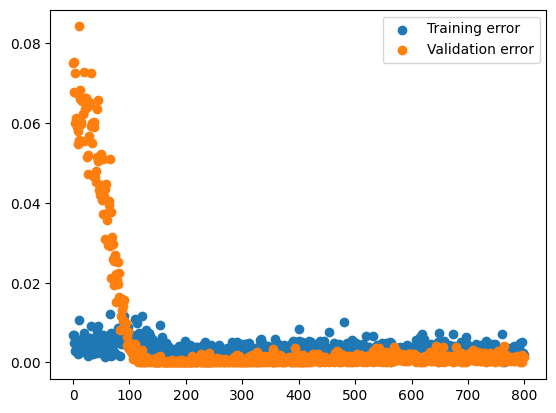

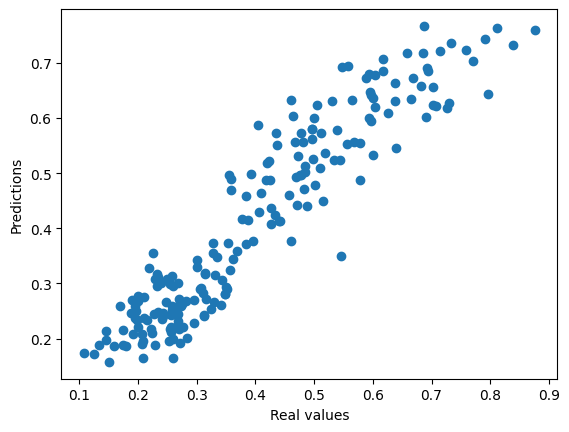

MAPE:  0.14516488634298746


In [3]:
from MyNeuralNetwork import MyNeuralNetwork
from sklearn.metrics import mean_absolute_percentage_error
# Create the neural network with the given parameter
nn = MyNeuralNetwork(
    layers=config_data["layers"],
    activation_function=config_data["activation_function"],
    perc=config_data["perc"],
    epochs=config_data["epochs"],
    learning_rate=config_data["learning_rate"],
    momentum=config_data["momentum"]
)

# Train the neural network
nn.fit(train_validation_set[:, :-1], train_validation_set[:, -1]) 

# Get errors and plot them
errors_train, errors_valid = nn.loss_epochs()

# Scatter plot of the training and validation errors
plt.scatter(errors_train[:, 0], errors_train[:, 1], label="Training error")
plt.scatter(errors_valid[:, 0], errors_valid[:, 1], label="Validation error")
plt.legend()
plt.show()

# Predict
predictions = nn.predict(test_set[:, :-1])

# Scatter Plot predictions vs real values
plt.scatter(test_set[:, -1], predictions)
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.show()

# Compute MAPE
mape = mean_absolute_percentage_error(test_set[:, -1], predictions)
print("MAPE: ", mape)

#### MLR SKLEARN

MAPE sklearn:  0.036316719960770655


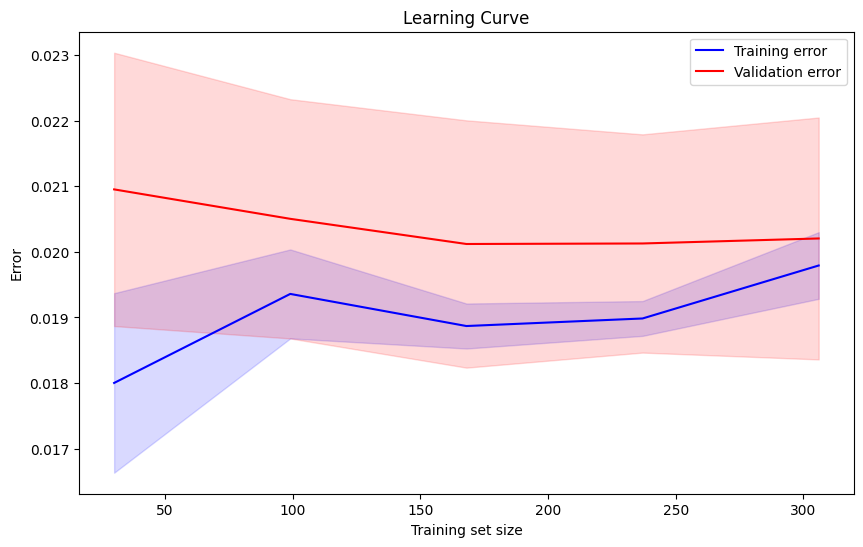

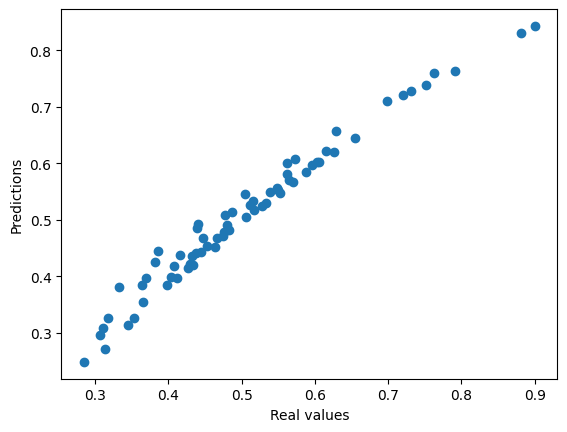

In [ ]:
# Compare with sklearn MLRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

model = LinearRegression()

model.fit(train_validation_set[:, :-1], train_validation_set[:, -1])
predictions = model.predict(test_set[:, :-1])
mape = mean_absolute_percentage_error(test_set[:, -1], predictions)
print("MAPE sklearn: ", mape)

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, train_validation_set[:, :-1], train_validation_set[:, -1], cv=5, scoring='neg_mean_absolute_error')

# Compute mean and std of the errors
train_errors = -train_scores
test_errors = -test_scores
train_errors_mean = np.mean(train_errors, axis=1)
train_errors_std = np.std(train_errors, axis=1)
test_errors_mean = np.mean(test_errors, axis=1)
test_errors_std = np.std(test_errors, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, label='Training error', color='blue')
plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_errors_mean, label='Validation error', color='red')
plt.fill_between(train_sizes, test_errors_mean - test_errors_std, test_errors_mean + test_errors_std, alpha=0.15, color='red')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

# Scatter Plot predictions vs real values
plt.scatter(test_set[:, -1], predictions)
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.show()


#### TENSORFLOW NN




3/3 [==============================] - 0s 2ms/step
MAPE tensorflow:  0.11364891014756745


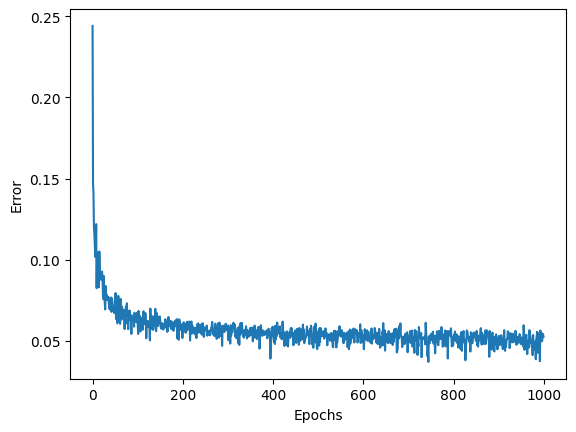

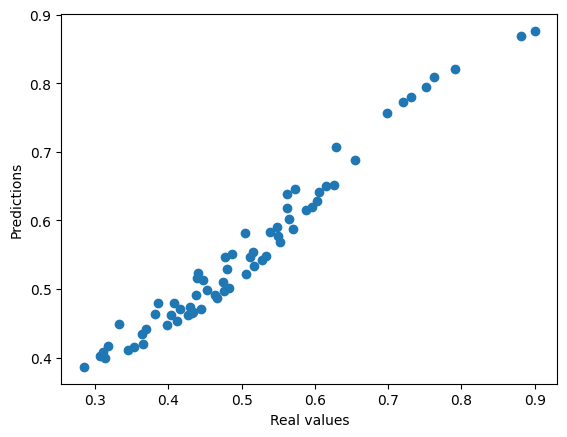

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Create the neural network with 4, 16, 4, 1 layers and tanh activation function
model = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=(4,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(8, activation='tanh'),
    layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=config_data["learning_rate"],
    momentum=config_data["momentum"]),
    loss='mean_absolute_error')

history = model.fit(
    train_validation_set[:, :-1],
    train_validation_set[:, -1],
    epochs=config_data["epochs"],
    verbose=0
)

predictions = model.predict(test_set[:, :-1])
mape = mean_absolute_percentage_error(test_set[:, -1], predictions)
print("MAPE tensorflow: ", mape)

# Scatter Plot error evolution
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# Scatter Plot predictions vs real values
plt.scatter(test_set[:, -1], predictions)
plt.xlabel("Real values")
plt.ylabel("Predictions")
plt.show()
